In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def normalize(data):
  mean = data.describe().loc["mean"]
  std = data.describe().loc["std"]
  data = (data - mean) / std
  return data

In [ ]:
path = "/content/IE440Final24ClusteringData.txt"
df = pd.read_csv(path, sep = "\t")
data = df.copy()
data[['x', "y"]] = normalize(data[["x", "y"]])

In [ ]:
def visualize(cluster_centers = None, points=data):
  plt.figure(figsize=(8, 6))
  for cls in points.Class.unique():
    class_set = points[points['Class'] == cls]
    plt.scatter(class_set['x'], class_set['y'], alpha=0.7)
  if cluster_centers is not None:
    plt.scatter(cluster_centers[0], cluster_centers[1], s=50, marker="s", c="k", label="Cluster Centers")
    K = len(cluster_centers.T)
    plt.title(f"K = {K}")
    plt.legend()
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

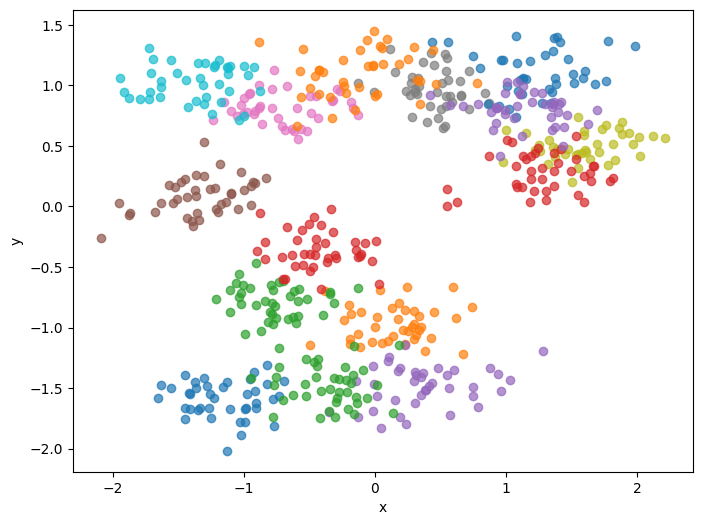

In [ ]:
visualize();

 Experiment for K = 5, 10 and 15 clusters. Plot the data and the final cluster centers.

In [ ]:
def vector_quantization(data, I, alpha, eta, epsilon):

  # put patterns in random order
  data = data.sample(frac=1, axis=0).reset_index(drop=True)
  # number of patters
  P = len(data)
  X = data[["x", "y"]].to_numpy()
  # random weight initialization
  w = np.random.random(size=(I, 2))
  b = np.zeros((I, P))

  while alpha > epsilon:
    for p in range(P):
      norm_list = []
      for i in range(I):
        norm = LA.norm(X[p] - w[i])
        norm_list.append(norm)
      ip = np.argmin(norm_list)
      b[ip][p]= 1
      delta_w = alpha * (X[p] - w[ip])
      w[ip] += delta_w

    z = 0
    for p in range(P):
      for i in range(I):
        d = np.sum(X[p] - w[i])
        z += b[i][p] * (d)**2

    alpha *= eta
  return b, w, z

z:  728.8920043499883


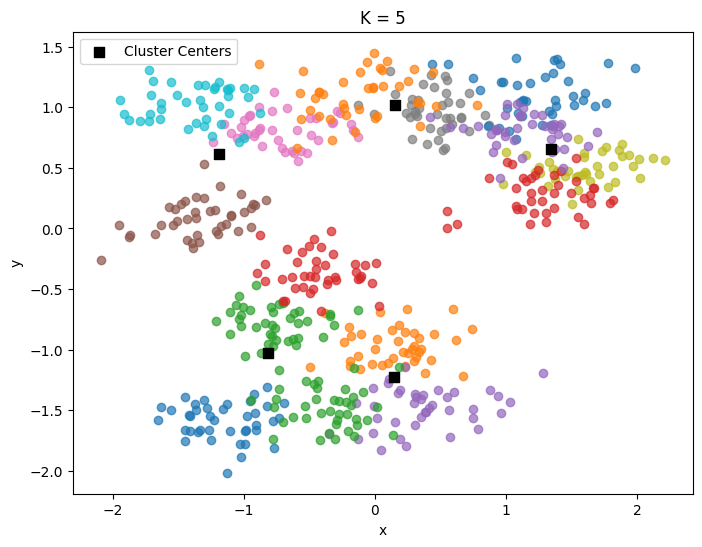

z:  346.87924599625666


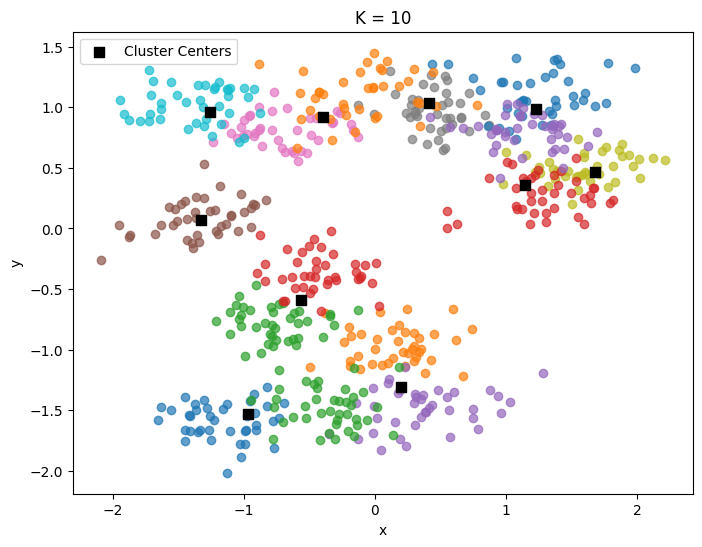

z:  448.31722913731573


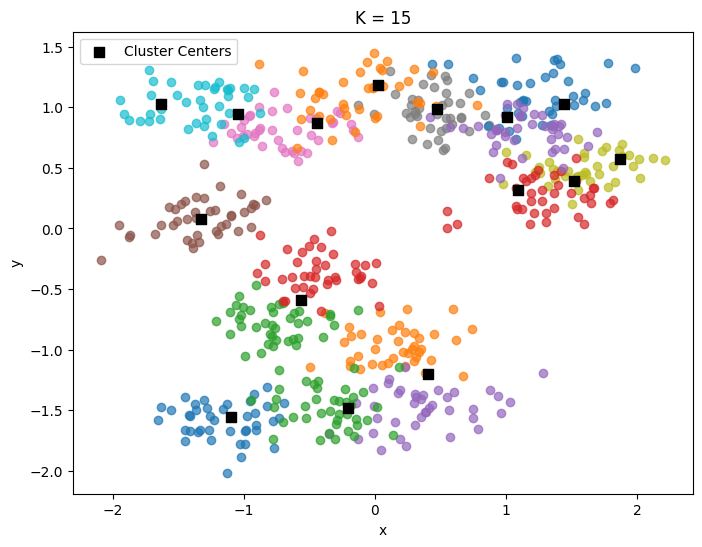

In [ ]:
b , w_vq_5, z_vq_5 = vector_quantization(data, 5, 0.2, 0.99 , 0.0001)
print("z: ", z_vq_5)
visualize(cluster_centers = w_vq_5.T)
b , w_vq_10, z_vq_10 = vector_quantization(data, 10, 0.2, 0.99 , 0.0001)
print("z: ", z_vq_10)
visualize(cluster_centers = w_vq_10.T)
b , w_vq_15, z_vq_15 = vector_quantization(data, 15, 0.2, 0.99 , 0.0001)
print("z: ", z_vq_15)
visualize(cluster_centers = w_vq_15.T)

z:  615.1422196604074


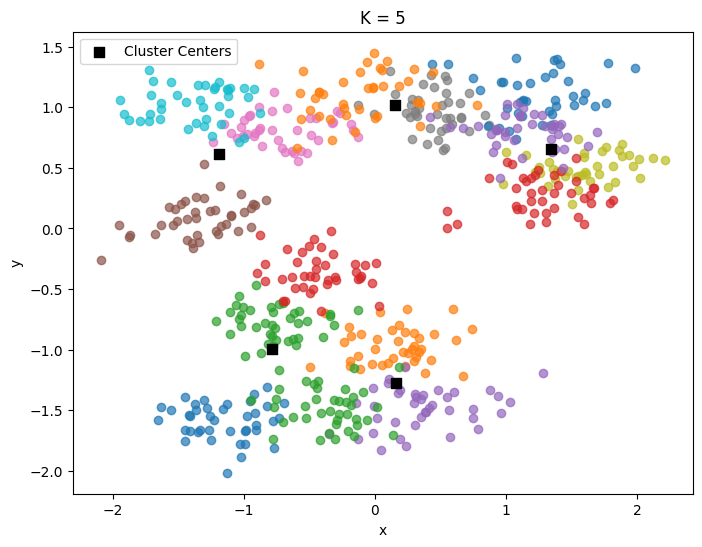

z:  775.7642643048563


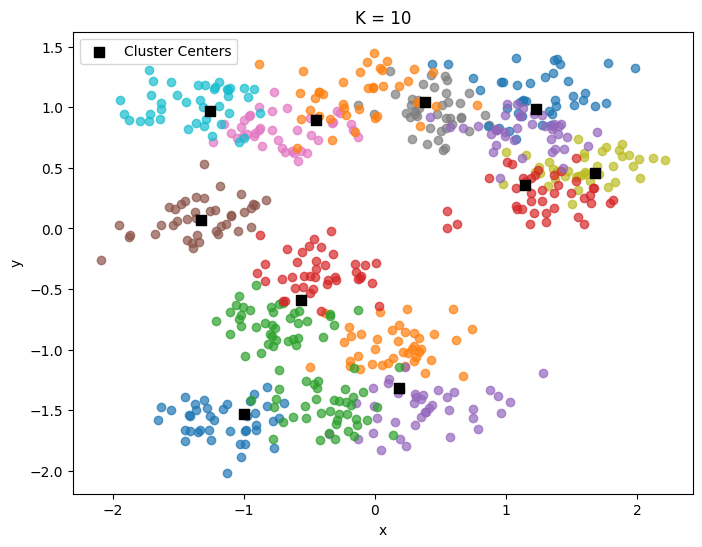

z:  540.3975732943615


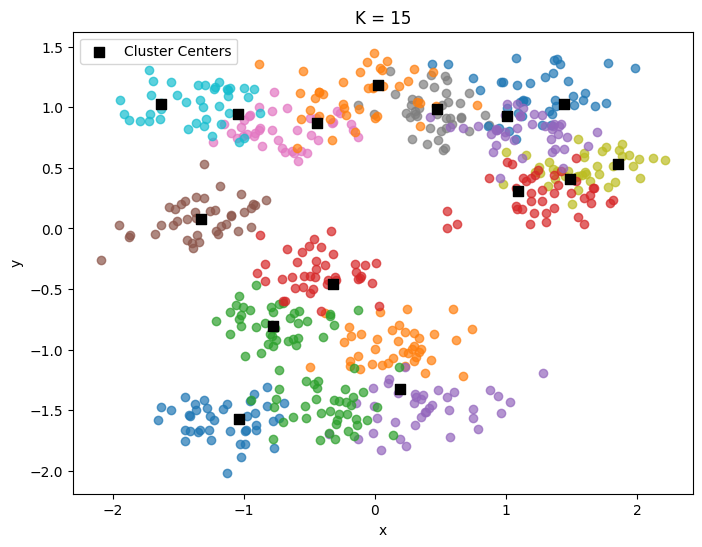

In [ ]:
b , w_vq_5, z_vq_5 = vector_quantization(data, 5, 0.1, 0.99 , 0.000001)
print("z: ", z_vq_5)
visualize(cluster_centers = w_vq_5.T)
b , w_vq_10, z_vq_10 = vector_quantization(data, 10, 0.1, 0.99 , 0.000001)
print("z: ", z_vq_10)
visualize(cluster_centers = w_vq_10.T)
b , w_vq_15, z_vq_15 = vector_quantization(data, 15, 0.1, 0.99 , 0.000001)
print("z: ", z_vq_15)
visualize(cluster_centers = w_vq_15.T)

z:  702.9974503797971


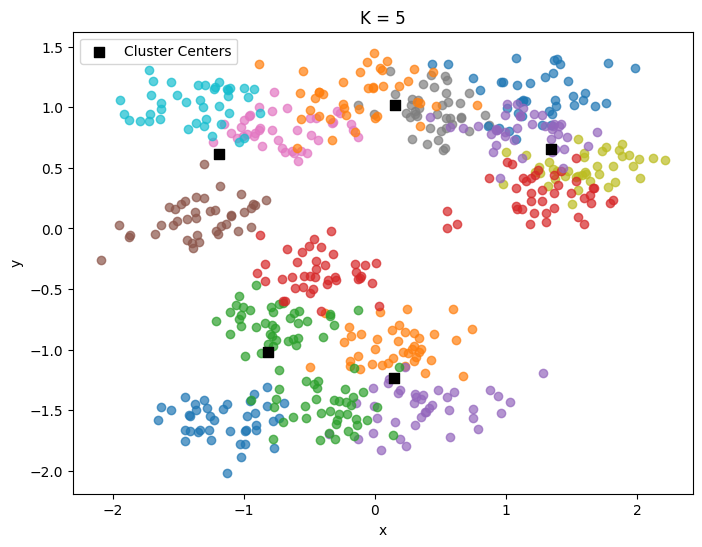

In [ ]:
b , w_vq, z_vq = vector_quantization(data, 5, 0.5, 0.99 , 0.0001)
print("z: ", z_vq)
visualize(cluster_centers = w_vq.T)

z:  324.47001741393365


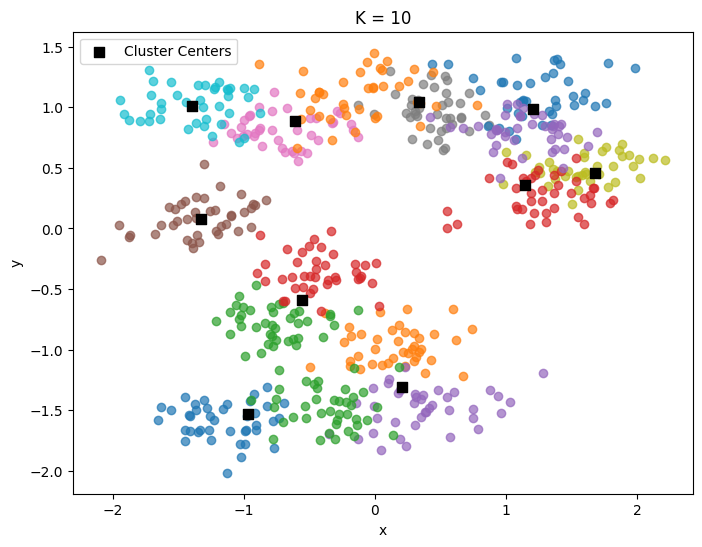

In [ ]:
b , w_vq, z_vq = vector_quantization(data, 10, 0.25, 0.9 , 0.001)
print("z: ", z_vq)
visualize(cluster_centers = w_vq.T)

z:  485.50726986966106


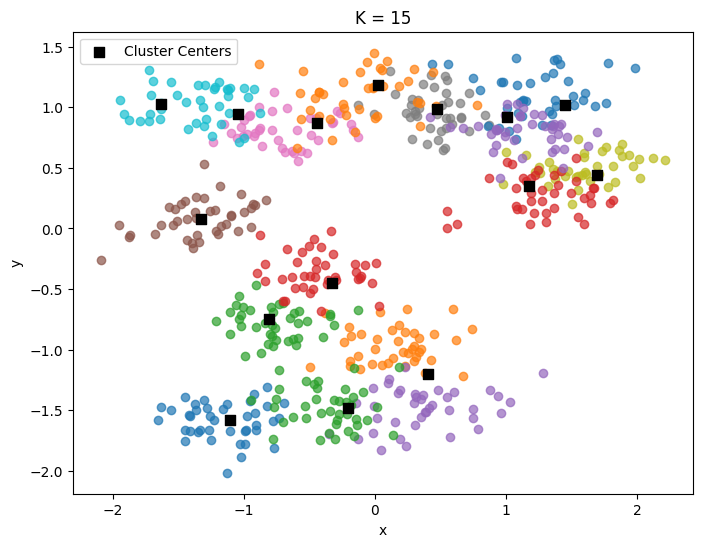

In [ ]:
b , w_vq, z_vq = vector_quantization(data, 15, 0.1, 0.99 , 0.00001)
print("z: ", z_vq)
visualize(cluster_centers = w_vq.T)